In [26]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [27]:
cd /content/gdrive/My\ Drive/faraji/digikala

/content/gdrive/My Drive/faraji/digikala


In [0]:
from sklearn.utils import resample

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
data = pd.read_excel('digi_clean.xlsx')

In [0]:
data

,Unnamed: 0,product_id,product_title,title_en,user_id,likes,dislikes,verification_status,recommend,title,comment,advantages,disadvantages,commnet
0,0,3692,ماوس بی‌سیم لاجیتک مدل M325,IT,989472,0,0,verified,1,فیلد خالی,واقعا عالیه ازش خیلی راضیم,فیلد خالی,فیلد خالی,واقعا عالیه ازش خیلی راضیم
1,1,90213,شارژر همراه شیاومی مدل NDY-02-AN با ظرفیت 1000...,AC,3862150,4,1,verified,2,واقعا عالیه,سلام قبل اینکه نظرم رو بگم میخواستم موضوع مهم ...,عمر طولانی افت بسیار کم میزان شارژ امپر خروجی ...,داشتدار,سلام قبل اینکه نظرم رو بگم میخواستم موضوع مهم ...
2,2,59473,یدک پولیشر میکروفایبر مهسان مدل 20119,HW,626843,1,0,verified,0,خیلی سخت حوله اش میاد,گیره های فلزی خیلی سخت میشوند لذا حوله خیلی سخ...,فیلد خالی,فیلد خالی,گیره های فلزی خیلی سخت میشوند لذا حوله خیلی سخ...
3,3,120499,گوشی موبایل هوآوی آنر مدل 5X KIW-L21 دو سیم‌کارت,MO,786887,6,11,verified,1,گوشی مقرون صرفه,چیز رابطه ظاهر گوشی بسیار خوب بدنه یکپارچه فلز...,صفحه نمایش پرنور کیفیت کیفیت بالای ساخت باتری ...,کیفیت پایین اسپیکر حاشیه خالی زیر صفحه نمایش ع...,چیز رابطه ظاهر گوشی بسیار خوب بدنه یکپارچه فلز...
4,4,67200,شارژر همراه شیائومی مدل Mi ظرفیت 5000 میلی آمپ...,AC,854531,19,4,verified,1,ابعاد استحکام نگهداری شارژ مناسب,ظرفیتش براتون کافیه حتما بخرید یه شارژر ۵ ولت ...,ظریف زیبا باریک بدنه محکم دوام,ظرفیت متوسط,ظرفیتش براتون کافیه حتما بخرید یه شارژر ۵ ولت ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,549845,شید آباژور آرام مدل SH45/01,TC,4979401,0,0,verified,2,بسیار تمیز زیبا,بسیار تمیز زیبا خیلی راضیم,کاملا مطابق عکس ساخت بسیار تمیز,داشتدار,بسیار تمیز زیبا خیلی راضیم
99996,99996,784160,کفش مخصوص دویدن مردانه و زنانه آلبرتینی مدل دا...,FA,1066034,7,32,verified,1,توصیه خرید میکنم,کفش پیاده روی اربعین خریدم یکماه قبل امروز بیش...,سبک زیبا ارزان,محل عبور بند کفش ها ایراد,کفش پیاده روی اربعین خریدم یکماه قبل امروز بیش...
99997,99997,820985,واکس کفش ساتل مدل 20 حجم 60 میلی لیتر,FA,568208,0,0,verified,2,خوبه غلیظه,واکس خوبیه,روغنیه,دیدبین,واکس خوبیه
99998,99998,678073,کش رنگی مدادچوبی مدل 010 بسته 100,TC,981594,2,1,verified,1,سلام,هیچ کدوم رنگهای توی عکسه داخل بسته نیست فقط رن...,فیلد خالی,فیلد خالی,هیچ کدوم رنگهای توی عکسه داخل بسته نیست فقط رن...


In [0]:
data['likes'].median() 
m=data['likes'].mean()
sigma=data['likes'].std()


In [0]:
d=data[data['dislikes'] >0]

In [0]:
print(d.shape)
d['dislikes'].describe()

(42562, 14)


count    42562.000000
mean         3.875429
std         13.342130
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max       1344.000000
Name: dislikes, dtype: float64

In [0]:
d['dislikes'].median()


2.0

In [0]:
data_1=data[(data['likes'] ==0 )& (data['dislikes'] ==0)]
print(data_1.shape)

(26531, 14)


In [30]:
 new_data= data.drop(data[(data['likes'] == 0) & (data['dislikes'] == 0)].index)
 print(new_data.shape)

(73469, 14)


In [0]:
print(new_data['likes'].median())
new_data['likes'].describe()

2.0


count    73469.000000
mean         4.239598
std          9.134335
min          0.000000
25%          1.000000
50%          2.000000
75%          5.000000
max        854.000000
Name: likes, dtype: float64

In [0]:
 new_data[new_data['dislikes'] ==0].shape

(30907, 14)

In [0]:
new_data[new_data['likes'] ==0].shape

(6581, 14)

In [0]:
 new_data[new_data['dislikes'] >=2].shape

(24344, 14)

In [0]:
 new_data[new_data['dislikes'] <2].shape

(49125, 14)

In [0]:
 new_data[new_data['likes'] >=3].shape

(34048, 14)

In [0]:
 new_data[new_data['likes'] <3].shape

(39421, 14)

In [31]:
class_1=new_data[(new_data['likes']  <3) & (new_data['dislikes'] <2)]
class_1['class']='0'

class_2=new_data[(new_data['likes'] <3)& (new_data['dislikes'] >=2)]
class_2['class']='1'

class_3=new_data[(new_data['likes'] >=3)& (new_data['dislikes'] <2) ]
class_3['class']='2'

class_4=new_data[(new_data['likes'] >=3)& (new_data['dislikes'] >=2)]
class_4['class']='3'

# class_5=new_data[(new_data['likes'] >0)& (new_data['dislikes'] ==0)]
# class_5['class']='4'

# class_6=new_data[(new_data['likes'] ==0)& (new_data['dislikes'] >0)]
# class_6['class']='5'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/s

In [32]:
print(class_1.shape,class_2.shape, class_3.shape ,class_4.shape )

(30716, 15) (8705, 15) (18409, 15) (15639, 15)


In [0]:
data_f = pd.concat([class_1,class_2, class_3 ,class_4])

In [34]:
data_f.shape

(73469, 15)

In [0]:
data_f.to_csv("unbalance_classified.csv")  

In [0]:
class_2f= resample(class_2, 
                                 replace=True,     # sample with replacement
                                 n_samples=30000,    # to match majority class
                                 random_state=123)
class_3f= resample(class_3, 
                                 replace=True,     # sample with replacement
                                 n_samples=30000,    # to match majority class
                                 random_state=123)
class_4f= resample(class_4, 
                                 replace=True,     # sample with replacement
                                 n_samples=30000,    # to match majority class
                                 random_state=123)

In [42]:
print(class_1.shape,class_2f.shape, class_3f.shape ,class_4f.shape )

(30716, 15) (30000, 15) (30000, 15) (30000, 15)


In [0]:
data_ff = pd.concat([class_1,class_2f, class_3f ,class_4f])

In [44]:
data_ff.shape

(120716, 15)

In [0]:
data_ff.to_csv("balance_classified.csv")  

In [0]:
x10=data[data['likes']<=m+3*sigma ]
# x20=data[data['likes']>=half_m]
# x30= pd.concat([x10, x20])
print(x10.shape)


(98928, 12)


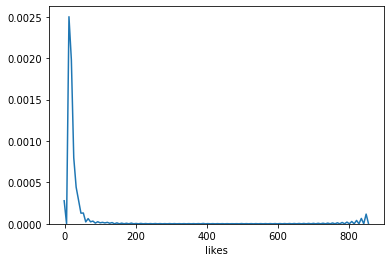

In [0]:
sns.distplot(x, hist=False, rug=False);

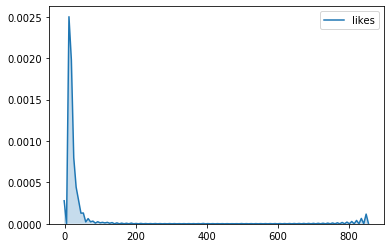

In [0]:
sns.kdeplot(x, shade=True);

In [0]:
y=data['dislikes']

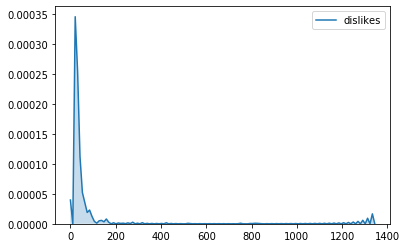

In [0]:
sns.kdeplot(y, shade=True);

In [0]:
y.describe()

count    100000.000000
mean          1.649460
std           8.912705
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max        1344.000000
Name: dislikes, dtype: float64

In [0]:
x.describe()

count    100000.000000
mean          3.114790
std           8.050031
min           0.000000
25%           0.000000
50%           1.000000
75%           4.000000
max         854.000000
Name: likes, dtype: float64

(74719, 12)


In [0]:
xx10=data[data['likes']>=3.114790]

In [0]:
xx10['likes'].mean()

1.993529804199803

In [0]:
x10['likes'].mean()

20.196830188679247

In [0]:
df_minority_upsampled.shape

(74719, 12)

In [0]:
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [0]:
x=df_upsampled['likes']

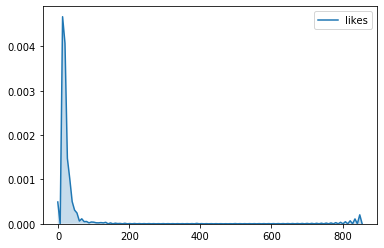

In [0]:
sns.kdeplot(x, shade=True)

In [0]:
df_upsampled[df_upsampled['likes']>=3]

,product_id,product_title,title_en,user_id,likes,dislikes,verification_status,recommend,title,comment,advantages,disadvantages
6,148509,اسپیکر بلوتوثی دیووم مدل Bluetune bean,IT,574130,3,0,verified,recommended,بسیار خوب,من چند سالی هست که این اسپیکرو خریدم و واقعا ح...,"[""کیفیت ساخت بسیار خوب\r"",""کیفیت صدا بسیار عال...","[""ندارد""]"
19,21340,ماشین اصلاح صورت پاناسونیک سری Lamdash مدل ES-...,PA,1309402,3,1,verified,\N,قیمت مناسب و با کیفیت,حدود یک ساله دارمش راضی ام ازش نسبت به قیمتش م...,"[""پر قدرت طراحی زیبا ...سبک...به صرفه""]","[""ندارد""]"
20,144139,هدفون کریتیو مدل MA200,AC,608250,3,12,verified,not_recommended,نه چندان خوب,سلام و خسته نباشید به تمامی کارکنان و بازدید ک...,"[""کیفیت ساخت""]","[""صدای پایین و بی کیفیت""]"
24,116387,اسپیکر هترون مدل HSP260,IT,2767161,3,0,verified,recommended,یک انتخاب هوشمند,اگر با قیمتش مشکلی ندارید نسبت به صداش شک نکنی...,"[""صدای فوق العاده\r"",""بیس عالی\r"",""بلوتوث سریع...","[""خط و خش سریع میفته روش\r"",""نداشتن صفحه نمایش""]"
41,121304,هدفون بی سیم سامسونگ مدل Level U Pro,AC,1456800,3,0,verified,recommended,level u pro,در هنگام پیاده روی وقتی تو جیبتونه و یا تو دست...,"[""کیفیت مکالمه ی خوب\r"",""میکروفون عالی\r"",""کیف...","[""قطع و وصل جزئی در بعضی مواقع""]"
...,...,...,...,...,...,...,...,...,...,...,...,...
26725,134558,هدست استریو بی سیم ال جی مدل Tone Pro HBS-760,AC,2386173,4,1,verified,recommended,عالی و در عین کیفیت,من این محصول رو دوسالی هست از دیجی کالا خریدار...,NaN,NaN
36026,740004,لواشک پذیرایی چند میوه خشکپاک بسته چهار عددی,DF,1141073,21,2,verified,not_recommended,اصلا پیشنهاد نمیکنم,من هرگز خرید این محصول را پیشنهاد نمیکنم خیلی ...,NaN,NaN
1784,312881,ماشین حساب ایرانی پارس حساب مدل PX-4600 Plus II,MA,5236662,10,2,verified,recommended,واقعا عالیه,من اینو پارسال گرفتم واقعا عالیه از همه نظر.,NaN,NaN
22984,455271,لحاف لایت میکرو راشا دونفره,HW,4508859,5,1,verified,recommended,جنسش عالیه و فوق‌العاده لطیفه,جنسش عالیه و فوق‌العاده لطیفه,NaN,NaN


In [0]:
df_upsampled[df_upsampled['likes']<=3]

,product_id,product_title,title_en,user_id,likes,dislikes,verification_status,recommend,title,comment,advantages,disadvantages
0,3692,ماوس بی‌سیم لاجیتک مدل M325,IT,989472,0,0,verified,\N,NaN,واقعا عالیه. من که ازش خیلی راضیم,NaN,NaN
2,59473,یدک پولیشر میکروفایبر مهسان مدل 20119,HW,626843,1,0,verified,not_recommended,خیلی سخت حوله اش در میاد,گیره های فلزی خیلی سخت تا میشوند و لذا حوله را...,NaN,NaN
6,148509,اسپیکر بلوتوثی دیووم مدل Bluetune bean,IT,574130,3,0,verified,recommended,بسیار خوب,من چند سالی هست که این اسپیکرو خریدم و واقعا ح...,"[""کیفیت ساخت بسیار خوب\r"",""کیفیت صدا بسیار عال...","[""ندارد""]"
7,56871,ادو پرفیوم زنانه امپر مدل Chifon حجم 100 میلی ...,PC,1139954,2,2,verified,\N,عطر...,بوی تند ولی خوشبو داره.ماندگاریش خوبه و هر چقد...,NaN,NaN
8,49738,ماشین اصلاح صورت رمینگتون مدل MB4555,PA,2764879,2,1,verified,\N,عمر مفید کوتاه,متاسفانه عمر مفید این ماشین کم هست و بعد از دو...,NaN,"[""طراحی ارگونومیک نیست\r"",""حین اصلاح مو بین تی..."
...,...,...,...,...,...,...,...,...,...,...,...,...
99994,400647,کفش راحتی مردانه نایکی مدل Nightgazer Lw,FA,981594,0,0,verified,no_idea,سلام,کیفیت ساختش بد نیست ولی نسبت به قیمتش و برند ن...,NaN,NaN
99995,549845,شید آباژور آرام مدل SH45/01,TC,4979401,0,0,verified,recommended,بسیار تمیز و زیبا,بسیار تمیز و زیبا...من که خیلی راضیم,"[""کاملا مطابق با عکس\r"",""ساخت بسیار تمیز""]","[""ندارد""]"
99997,820985,واکس کفش ساتل مدل 20 حجم 60 میلی لیتر,FA,568208,0,0,verified,recommended,خوبه و غلیظه,واکس خوبیه..,"[""روغنیه""]","[""ندیدم""]"
99998,678073,کش رنگی مدادچوبی مدل 010 بسته 100,TC,981594,2,1,verified,no_idea,سلام,هیچ کدوم از این رنگهای که توی عکسه داخل بسته ن...,NaN,NaN


In [0]:
x.describe()

count    149438.000000
mean          5.198791
std          10.653782
min           0.000000
25%           1.000000
50%           3.500000
75%           6.000000
max         854.000000
Name: likes, dtype: float64